In [1]:
import pandas as pd
import regression_over_params as rp

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
# Dataset from : https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
df = pd.read_excel('data/Folds5x2_pp.xlsx')

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
target_var = 'AT'
y = df[target_var].values
X = df[df.columns.difference([target_var])].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42, shuffle=True)

In [6]:
models = {
    'Ada': AdaBoostRegressor(random_state=42, n_estimators=100),
    'RF': RandomForestRegressor( n_jobs=-1, random_state=42)
}


coeffs = {
    'Ada': {
        'n_estimators': [5, 20, 50],
    },
    'RF': {
        'n_estimators': [1, 2, 8, 16],
        'max_depth': [2, 4, 6] 
    }
}

In [7]:
fitted = rp.fit_all_models_over_params(coeffs, models, X_train, X_test, y_train)
fitted

{'Ada': {'n_estimators': {5: array([19.92764925, 29.23074803, 25.04029772, ..., 18.36987784,
          10.59294737, 21.34293348]),
   20: array([19.42954623, 29.67420279, 25.04029772, ..., 17.52867769,
          10.77491979, 21.64758837]),
   50: array([19.42954623, 29.44880868, 24.7226387 , ..., 16.08619984,
          10.60841549, 21.64758837])}},
 'RF': {'n_estimators': {1: array([21.09, 26.3 , 24.56, ..., 15.  , 12.39, 22.17]),
   2: array([19.96 , 27.375, 23.295, ..., 15.   , 12.39 , 20.805]),
   8: array([20.08125, 28.27   , 23.71   , ..., 17.03875, 12.19625, 21.26375]),
   16: array([20.4225  , 28.32875 , 24.230625, ..., 17.0275  , 12.24875 ,
          21.17    ])},
  'max_depth': {2: array([21.84022614, 27.64006845, 27.30908881, ..., 15.22281252,
           9.11467468, 22.28222727]),
   4: array([19.34547051, 28.50468645, 24.59456505, ..., 16.87823061,
          10.98427165, 21.86045757]),
   6: array([20.27595318, 29.66293788, 24.79337986, ..., 17.31109182,
          11.3117959

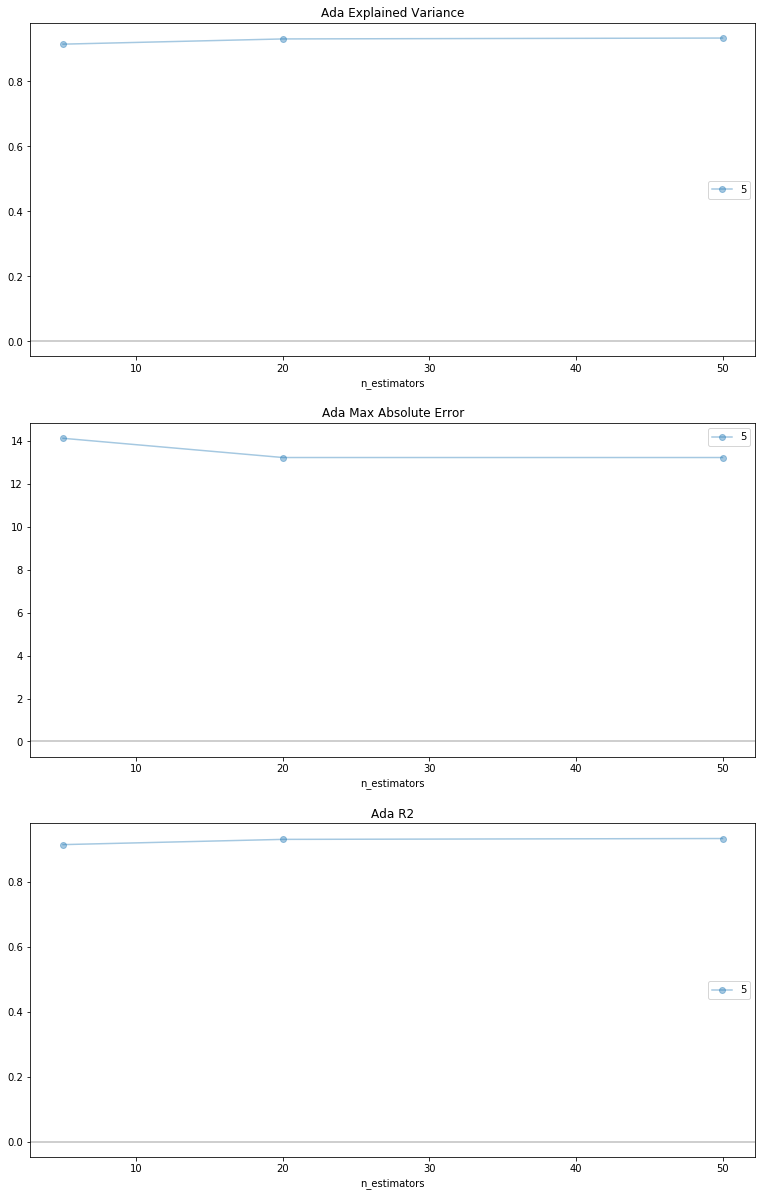

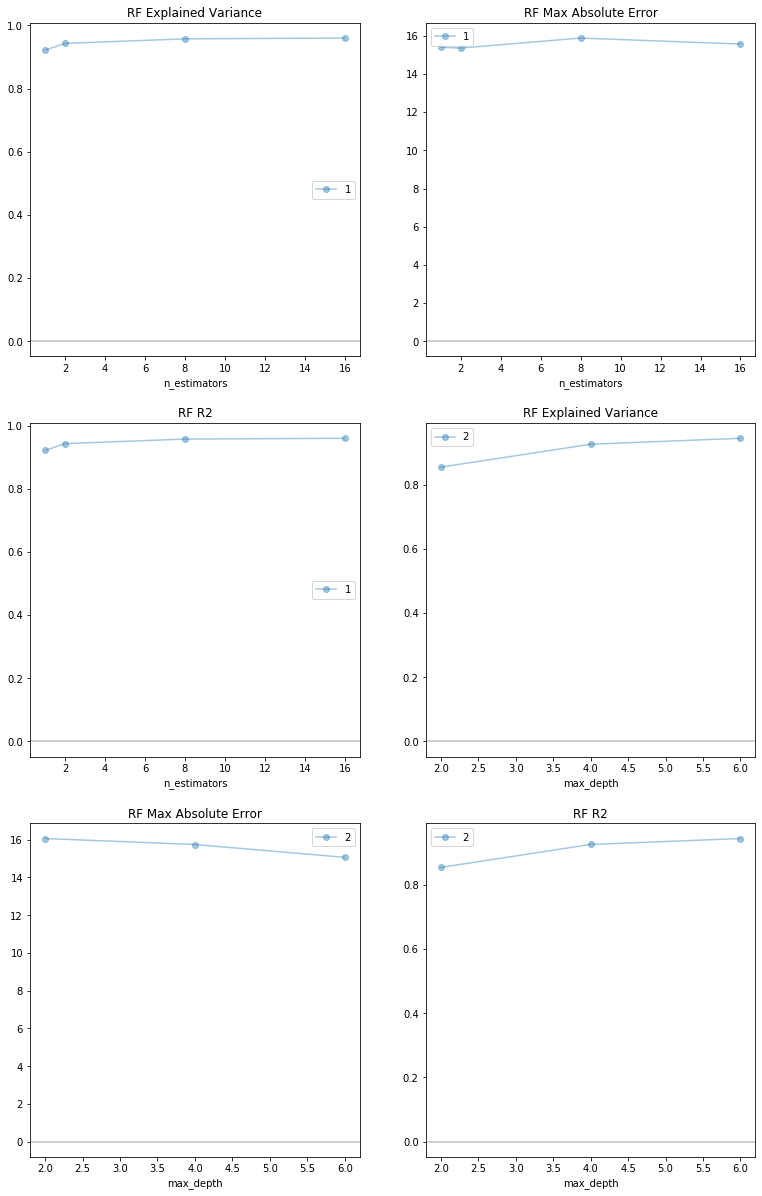

In [8]:
rp.plot_all_scores_vs_c(fitted, y_test)